In [197]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.colors import Normalize
import matplotlib.cm as cm

init_printing(use_latex='mathjax',use_unicode=True)
from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


In [207]:
def funcs(t, z):
    #function defined this way for use of solve_ivp
    x1, x2 = z
    u=1
    return [x1*x2 - 4*x1 - 2*x1*u, -x1*x2 + 2*x2 - x2*u]


def funcs_slide(t, z):
    #function defined this way for use of solve_ivp
    x1, x2 = z
    
    u =1
    
    s = sliding_surface(z)
    
    if s == True:
        num = -((2*x1**2)*x2 - (8*x1**2) - 2*x1*(x2**2) + 4*x2**2 + 80*x1-40*x2)
        den = (-4*(x1**2)-2*(x2**2) +40*x1 +20*x2)
        if den == 0:
            u = 0
        else:
            u = num/den
    if s == False:
        num = ((2*x1**2)*x2 - (8*x1**2) - 2*x1*(x2**2) + 4*x2**2 + 80*x1-40*x2)
        den = (-4*(x1**2)-2*(x2**2) +40*x1 +20*x2)
        if den == 0:
            u = 0
        else:
            u = num/den
    
    return [x1*x2 - 4*x1 - 2*x1*u, -x1*x2 + 2*x2 - x2*u]

def sliding_surface(z):
    x1,x2 = z
    
    if (x1 > 5) and (x2 > 5):
        s = True
    else:
        s = False
    return s


def runge_kutta(): 

    IP = [25,20]
    h = 0.01
    t = np.arange(0,25,h)

    x0 = IP[0]
    y = IP[1]
    _x = []
    _y = []
    for i in range(0, len(t)): 

        k1 = funcs_slide(t,[x0, y])[0]
        m1 = funcs_slide(t,[x0, y])[1] 

        k2 = funcs_slide(t + 0.5*h,[x0 + 0.5 * k1 * h, y + 0.5 * m1 * h])[0]
        m2 = funcs_slide(t + 0.5*h,[x0 + 0.5 * k1 * h, y + 0.5 * m1 * h])[1] 

        k3 = funcs_slide(t + 0.5*h,[x0 + 0.5 * k2 * h, y + 0.5 * m2 * h])[0] 
        m3 = funcs_slide(t + 0.5*h,[x0 + 0.5 * k2 * h, y + 0.5 * m2 * h])[1] 

        k4 = funcs_slide(t + h,[x0 + k3 * h, y + m3 * h])[0]
        m4 = funcs_slide(t + h,[x0 + k3 * h, y + m3 * h])[1]

        # Update next value of y 
        t = t + h
        x0 = x0 + (k1 + 2*k2 + 2*k3 + k4)*h * (1/6)
        y = y + (m1 + 2*m2 + 2*m3 + m4)*h * (1/6)
#         print('{},{}'.format(x0,y))
        _x.append(x0)
        _y.append(y)
        
#     print(data[0])
    plt.plot(_x,_y)
    plt.axis([0,50,0,25])
    plt.grid()
    plt.show()
        
# def sliding_mode():
    
#     IP = [[0,0],[25,20]]
#     DT = 0.1
#     t = np.arange(0,5,DT)
#     data = []
#     for i in range(0,len(IP)):
#         x1 = IP[i][0]
#         x2 = IP[i][1]
        
#         a=[25/216,0,1408/2565,2197/4101,-1/5,0]
#         b=[16/135,0,6656/12825,28561/56430,-9/50,2/55]
#         g=[0,1/4,3/8,12/13,1,1/2]
#         f=[[0,0,0,0,0], [1/4,0,0,0,0], [3/32,9/32,0,0,0], [1932/2197,-7200/2197,7296/2197,0,0],[-8/27,2,-3544/2565,1859/4104,-11/40]]
        
#         for k in range(0, len(t)):
#             T11=DT*funcs_slide(t, [x1,x2])[0]
#             T12=DT*funcs_slide(t, [x1,x2])[1]

#             T21=DT*funcs_slide(t + g[1]*DT, [x1 + f[0][0]*T11, x2 + f[0][0]*T12])[0]
#             T22=DT*funcs_slide(t + g[1]*DT, [x1 + f[0][0]*T11, x2 + f[0][0]*T12])[1]

#             T31=DT*funcs_slide(t + b[2]*DT, [x1 + f[1][0]*T21 + f[1][0]*T21, x2 + b[1]*T22 + (b[2]-b[0])*T21])[0]
#             T32=DT*funcs_slide(t + b[2]*DT, [x1 + b[1]*T21 + (b[2]-b[0])*T11, x2 + b[1]*T22 + (b[2]-b[0])*T21])[1]

#             T41=DT*funcs_slide(t + b[5]*DT, [x1 + b[2]*T31 + b[4]*T21 + (b[3]-b[4]-b[5])*T11, x2 + b[2]*T32 + b[4]*T22 + (b[3]-b[4]-b[5])*T12])[0]
#             T42=DT*funcs_slide(t + b[5]*DT, [x1 + b[2]*T31 + b[4]*T21 + (b[3]-b[4]-b[5])*T11, x2 + b[2]*T32 + b[4]*T22 + (b[3]-b[4]-b[5])*T12])[1]

#             x1 = x1+(1/6)*(T11+2*T21+2*T31+T41)
#             x2 = x2+(1/6)*(T12+2*T22+2*T32+T42)
#             data.append([x1,x2])
#     print(data)
            
# #     plt.plot(data[0],data[1])
# #     plt.show()
    


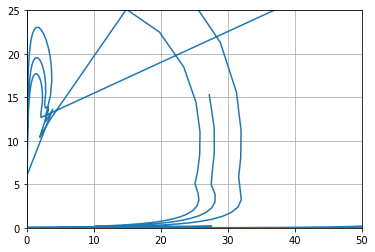

In [208]:
runge_kutta()

Text(0.5, 0, 'x1')

Text(0, 0.5, 'x2')

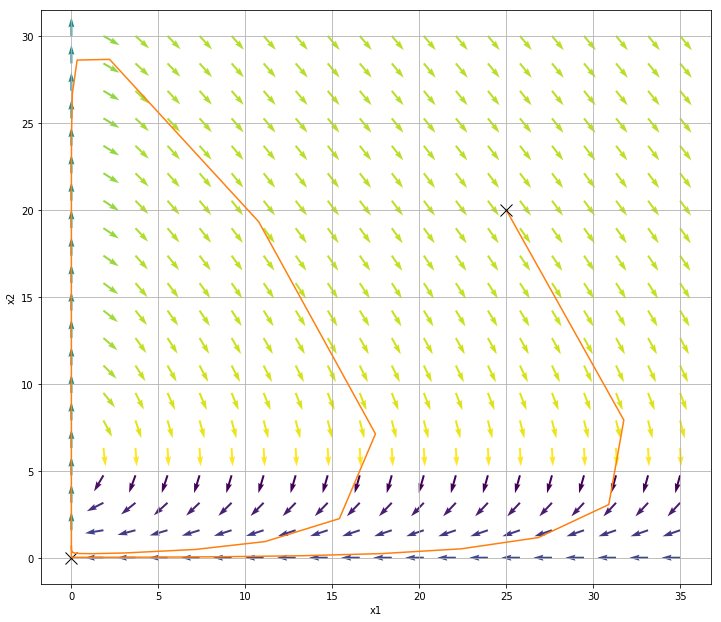

In [200]:
y1 = np.linspace(0, 35, 20)
y2 = np.linspace(0, 30, 20)

x, y = np.meshgrid(y1,y2)

u = np.zeros_like(x)
v = np.zeros_like(x)

a = np.seterr(divide='ignore', invalid='ignore')

for i in range(0, len(x)):
    Yprime = funcs(0,[x[i],y[i]])
    u[i] = Yprime[0]
    v[i] = Yprime[1]

for i in range(0, len(x)):
    Vmod = np.sqrt(u[i]**2 + v[i]**2)
    u[i] = u[i]/Vmod
    v[i] = v[i]/Vmod

IP = np.array([[0,0],[25,20]])

fig, ax = plt.subplots(figsize = (12,12))
    
for i in range(0, len(IP)):
    sol = solve_ivp(funcs,[0,10], IP[i])
    ax.plot(sol.y[0],sol.y[1])
    ax.plot(sol.y[0,0], sol.y[1,0], marker = 'x', markersize = 12, color = 'k')

colors = np.arctan2(u,v)

q = ax.quiver(x,y,u,v, colors)
ax.set_aspect('equal')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.grid()
plt.show()

In [114]:
IP = [[0,0],[25,20]]

IP[1][1]

for x in range(0,len(IP)):
    

20

0
1
